In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#데이타 읽어 들이기 
train =pd.read_csv('G:/Bigdata3/dataset/titanic/train_taitanic.csv.')
test =pd.read_csv('G:/Bigdata3/dataset/titanic/test_taitanic.csv.')

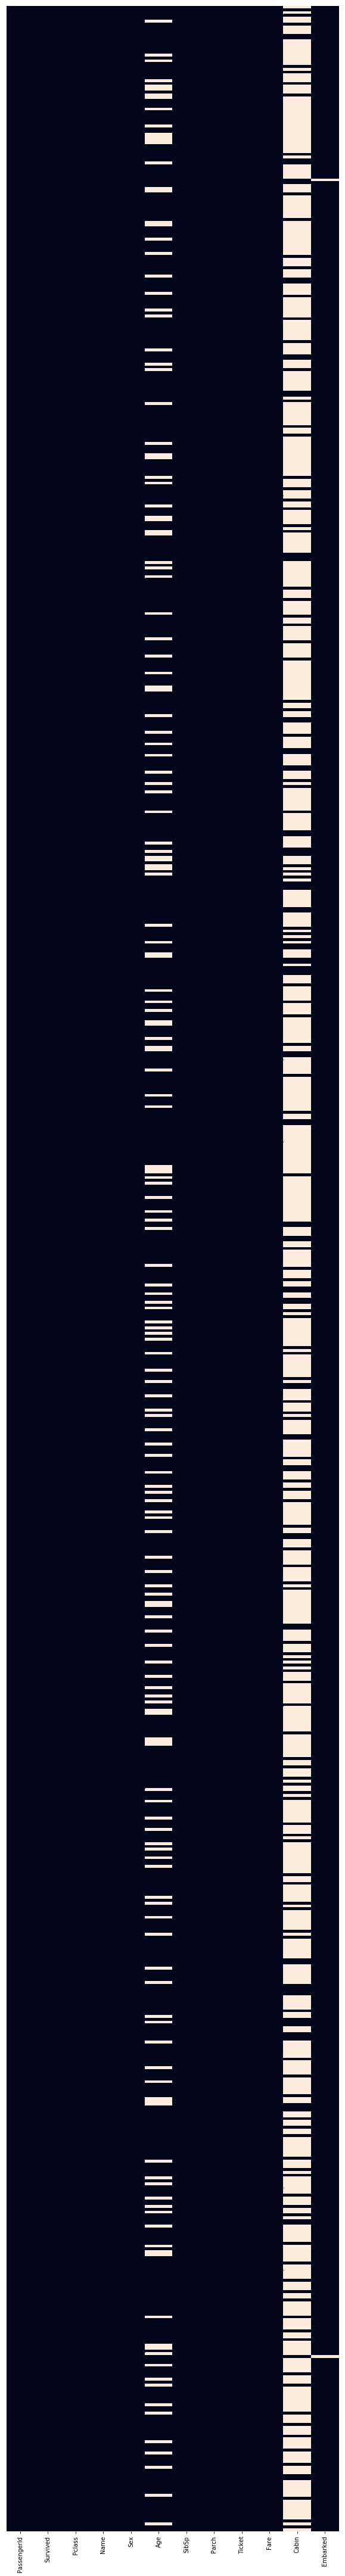

In [4]:
plt.figure(figsize=(10,78))
#cbar :color bar 
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

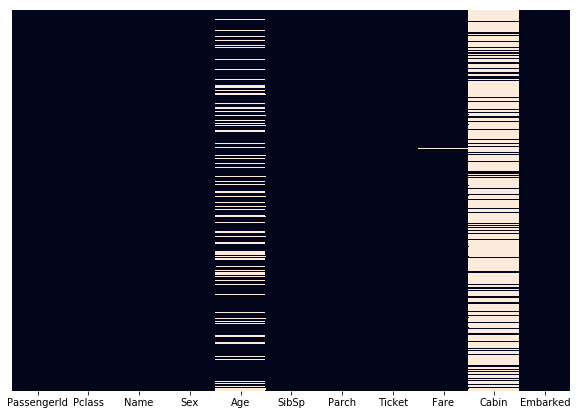

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

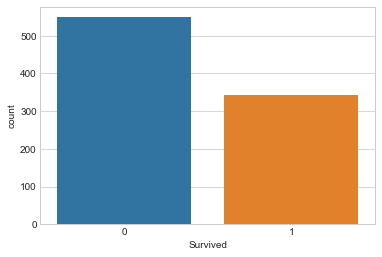

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

C:\Users\ktm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


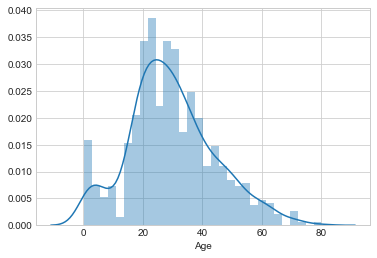

In [8]:
sns.distplot(train ['Age'].dropna(),bins=30)

C:\Users\ktm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ktm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


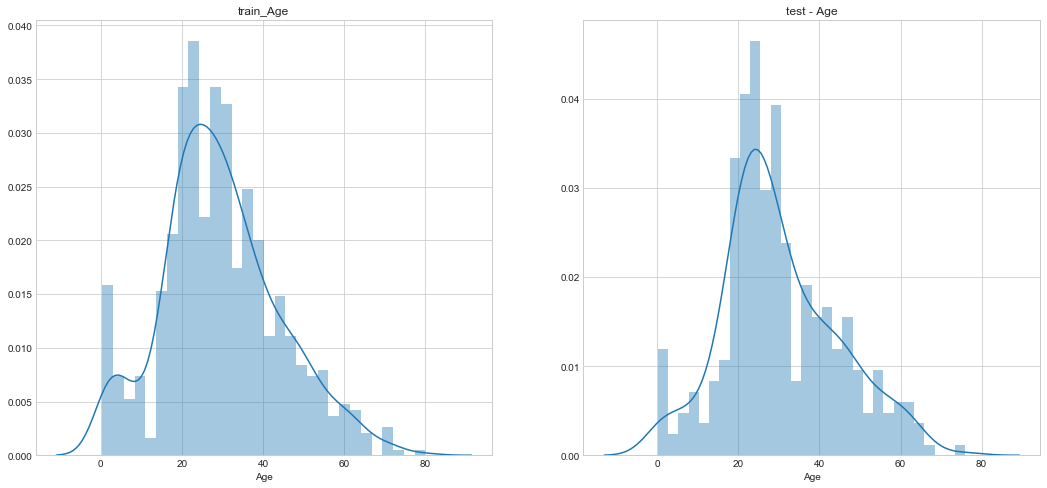

In [10]:
f,ax = plt.subplots(1,2, figsize=(18,8))

# 첫번째 그래프 
sns.distplot(train['Age'].dropna(),bins = 30,ax =ax[0])
ax[0].set_title('train_Age')
# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [11]:
# 결측치 
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [12]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
train['Embarked'].value_counts()
val_Embarked = train['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'] = train['Embarked'].fillna('S')

In [15]:
# fare 
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [16]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [17]:
# 나이에 대한 처리 
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [18]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 73.2+ KB
None


In [19]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

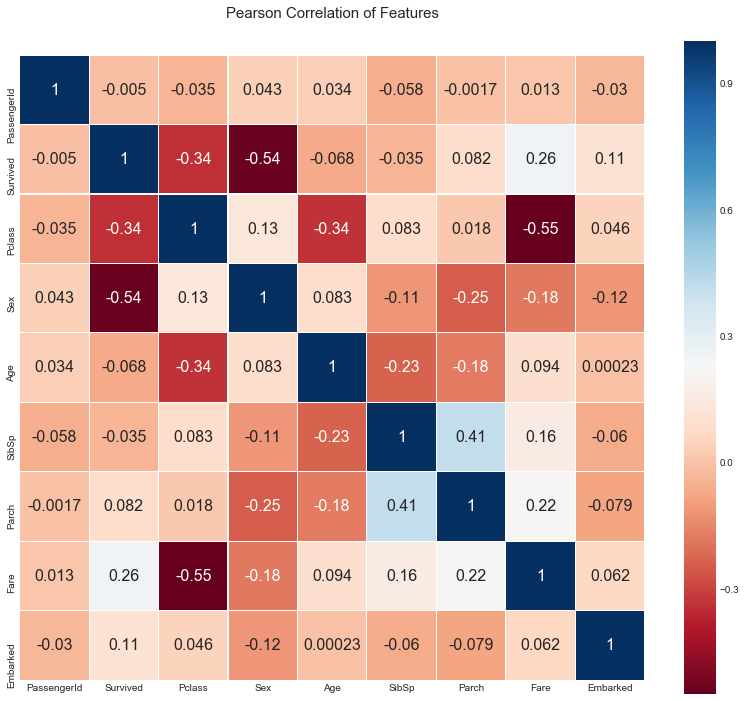

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [21]:
from sklearn.linear_model import LogisticRegression
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')


In [22]:
model = LogisticRegression()
# 학습
model.fit(X_train, y_train)
# 예측
predictions = model.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
test_passengerId = test['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
df_pred.to_csv("logistic_second_model.csv", index=False)